# Deep Learning with Torch - Exercise 1


## Introduction - Lua

 * Easy interface between low-level C/CUDA/C++ and high-level Lua 
 * Light-weight : used for embedded systems ;
 * Tables :
   * can be used as lists, dictionaries, packages, classes and objects 
   * make it easy to extend existing classes (at any level) 
 * Closures 
 * Based on Lua and runs on Lua-JIT (Just-in-time compiler) which is fast
 * Lua is pretty close to javascript.
   * variables are global by default, unless `local` keyword is used
 * Only has one data structure built-in, a table: `{}`. Doubles as a hash-table and an array.
 
Example : 

```lua
a = {1,2,a=3, print=function(self) print(self) end}
a:print() -- i.e. a.print(a)
```

Output :

```lua
{
  1 : 1
  2 : 2
  print : function: 0x417f11e0
  a : 3
}
```

---

## Introduction - Torch 7

Torch is an scientific computing framework based on Lua[JIT] with strong CPU and CUDA backends.

Strong points of Torch:

* Efficient Tensor library (like NumPy) with an efficient CUDA backend
* Lots of routines for indexing, slicing, transposing, ... 
* Amazing interface to C, via LuaJIT 
* Linear algebra routines 
* Neural Networks package -- build arbitrary acyclic computation graphs with automatic differentiation
   * also with fast CUDA and CPU backends
* Good community and industry support - several hundred community-built and maintained packages.
* Fast and efficient GPU support
* Easy to use Multi-GPU support and parallelizing neural networks
* Ports to iOS, Android and FPGA backends
* Used at Facebook, Google DeepMind, Twitter and more

http://torch.ch  
https://github.com/torch/torch7/wiki/Cheatsheet


---

# Packages

The Torch 7 distribution is made up of different packages, each its own github repository :

 * __torch7__/__cutorch__ : tensors, BLAS, file I/O (serialization), OOP, unit testing and cmd-line argument parsing 
 * __nn__/__cunn__ : easy and modular way to build and train simple or complex neural networks using `modules` and `criterions` 
 * __optim__ : optimization package for nn. Provides training algorithms like SGD, LBFGS, etc.
 * __trepl__ : torch read–eval–print loop, Lua interpreter, `th>` 
 * __paths__ : file system manipulation package 
 * __image__ : for saving, loading, constructing, transforming and displaying images 

Refer to the torch.ch website for a more complete list of official packages.
 
---


## Getting Started
#### Strings, numbers, tables - a tiny introduction

In [59]:
a = 'hello'

In [60]:
print(a)

hello	


In [61]:
b = {}

In [62]:
b[1] = a

In [63]:
print(b)

{
  1 : hello
}


In [6]:
b[2] = 30

In [7]:
for i=1, #b do -- the # operator is the length operator in Lua
    print(b[i]) 
end

hello	
30	


In [64]:
b['hash key'] = 8

In [9]:
print(b)

{
  1 : hello
  2 : 30
  hash key : 8
}


### Tensors

In [65]:
a = torch.Tensor(5,3) -- construct a 5x3 matrix, uninitialized

In [66]:
a = torch.Tensor({{1,2,3},{4,5,6},{7,8,9},{10,11,12}})
print(a)

  1   2   3
  4   5   6
  7   8   9
 10  11  12
[torch.DoubleTensor of size 4x3]



#### Each Tensor = Storage+View

In [67]:
print(a:storage())
print(a:view(3,4))

  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
[torch.DoubleStorage of size 12]

  1   2   3   4
  5   6   7   8
  9  10  11  12
[torch.DoubleTensor of size 3x4]



#### Slicing tensors

In [68]:
print(a[{{2,4},{}}]) -- dim 1, 2-4 (matlab: a[1,2:4])
print(a:narrow(1, 2, 3)) -- same


  4   5   6
  7   8   9
 10  11  12
[torch.DoubleTensor of size 3x3]

  4   5   6
  7   8   9
 10  11  12
[torch.DoubleTensor of size 3x3]



In [4]:
print(a:select(2,1)) -- dim 2 - index 1

  1
  4
  7
 10
[torch.DoubleTensor of size 4]



#### Assignments

In [69]:
a_new = a --indirect assignment - they are both pointing to same storage
a_clone = a:clone() --create new memory copy
a_new:zero() --zero inplace
print(a)
print(a_clone)
a = a_clone


 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.DoubleTensor of size 4x3]

  1   2   3
  4   5   6
  7   8   9
 10  11  12
[torch.DoubleTensor of size 4x3]



In [6]:
b=torch.rand(3,4)

In [7]:
-- matrix-matrix multiplication: syntax 1
a*b 

  2.4965   2.2475   2.9479   2.5002
  6.8316   5.6477   6.6907   7.0880
 11.1666   9.0478  10.4335  11.6758
 15.5017  12.4480  14.1763  16.2636
[torch.DoubleTensor of size 4x4]



In [8]:
-- matrix-matrix multiplication: syntax 2
torch.mm(a,b) 

  2.4965   2.2475   2.9479   2.5002
  6.8316   5.6477   6.6907   7.0880
 11.1666   9.0478  10.4335  11.6758
 15.5017  12.4480  14.1763  16.2636
[torch.DoubleTensor of size 4x4]



In [10]:
-- matrix-matrix multiplication: syntax 3
c = torch.Tensor(4,4)
c:mm(a,b) -- store the result of a*b in c

In [11]:
d = torch.rand(5,5)
d:mul(2) --multiply by 2

u,s,v = torch.svd(d) --singular value decomposition


d_vec = d:view(5*5) --view tensor as vector


Too many operations to mention. Check all at https://github.com/torch/torch7/blob/master/README.md

Some rules worth following:
* Use `local` as default
* Avoid uneeded memory allocations

#### CUDA Tensors
Tensors can be moved onto GPU using the :cuda function

In [12]:
require 'cutorch';
a = a:cuda()
b = b:cuda()
c = c:cuda()
c:mm(a,b) -- done on GPU

Getting packages is possible by:

``luarocks install <package name>``

available (some) packages at: http://htmlpreview.github.io/?https://github.com/torch/rocks/blob/master/index.html

---
# Neural Networks
Neural networks in Torch can be constructed using the `nn` package.

In [14]:
require 'nn';

`Modules` are the bricks used to build neural networks. Each are themselves neural networks, but can be combined with other networks using `containers` to create complex neural networks

Examples of nn containers are shown in the figure below:
![containers](https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/nn_containers.png)

Every neural network module in torch has automatic differentiation.
It has a `:forward(input)` function that computes the output for a given input, flowing the input through the network.
and it has a `:backward(input, gradient)` function that will differentiate each neuron in the network w.r.t. the gradient that is passed in. This is done via the chain rule.

## e.g: Linear Layer

In [15]:
linear = nn.Linear(3,5) --linear layer from 3 inputs to 5 outputs
print(linear) -- notice sizes, default type

nn.Linear(3 -> 5)
{
  gradBias : DoubleTensor - size: 5
  weight : DoubleTensor - size: 5x3
  gradWeight : DoubleTensor - size: 5x3
  gradInput : DoubleTensor - empty
  bias : DoubleTensor - size: 5
  output : DoubleTensor - empty
}


In [16]:
linear:zeroGradParameters() -- zero gradients accumoulation
print(linear.gradWeight, linear.gradBias)

 0  0  0
 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.DoubleTensor of size 5x3]

 0
 0
 0
 0
 0
[torch.DoubleTensor of size 5]



In [17]:
input = torch.rand(3) --random inputs
gradOutput = torch.rand(5) --random gradients flowing from below

In [18]:
y = linear:forward(input)
print(y)

-0.2204
-0.4888
 0.4590
 0.8662
 0.0440
[torch.DoubleTensor of size 5]



In [19]:
dE_dy = linear:backward(input, gradOutput) -- updateGradInput + accGradParameters
print(dE_dy)
print(linear.gradWeight, linear.gradBias) -- Gradients were accumulated

-0.0394
 0.4468
-0.0445
[torch.DoubleTensor of size 3]

 0.0201  0.0287  0.0087
 0.5193  0.7414  0.2249
 0.3354  0.4788  0.1452
 0.2985  0.4262  0.1293
 0.2806  0.4006  0.1215
[torch.DoubleTensor of size 5x3]

 0.0293
 0.7577
 0.4893
 0.4355
 0.4094
[torch.DoubleTensor of size 5]



### Stacking multiple layers

In [55]:
model = nn.Sequential()
model:add(nn.Linear(3,5))
model:add(nn.Sigmoid())
model:add(nn.Linear(5,10))
model:add(nn.LogSoftMax())

y = model:forward(input)
print(y)

-2.6250
-2.4215
-2.1173
-2.4481
-2.1662
-2.4232
-1.9807
-2.6480
-2.0697
-2.3673
[torch.DoubleTensor of size 10]



#### All operations can (and usually are) made in batches of examples

In [27]:
batch = torch.rand(16, 3) --batch of 16 examples
y = model:forward(batch)
print(y:size()) -- 16 outputs

 16
 10
[torch.LongStorage of size 2]



#### Criterion

In [58]:
criterion = nn.MSECriterion() --mean-square-error criterion
loss = criterion:forward(y, y/2) --evaluate loss
print(loss)

dE_dy = criterion:backward(y, y/2) --calculate error gradient

1.3654543004233	


#### running on Cuda using `cunn`

In [22]:
require 'cunn';
model:cuda()
batch = batch:cuda()
y = model:forward(batch)

# Practical example: AutoEncoder

 60000
    28
    28
[torch.LongStorage of size 3]



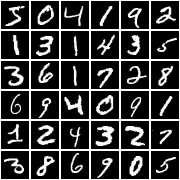

In [70]:
mnist = require 'mnist';
trainData = mnist.traindataset();
testData = mnist.testdataset();

trainData = trainData.data:float(); --turn data to float (originaly byte)
testData = testData.data:float();

trainData:add(-127):div(128); -- center data around 0
testData:add(-127):div(128);

print(trainData:size())
itorch.image(trainData:narrow(1,1,36))

In [71]:
require 'nn'
require 'cunn'

local hSize = 32
model = nn.Sequential()
model:add(nn.View(28 * 28)) --reshapes the image into a vector without copy
model:add(nn.Linear(28 * 28, hSize))
model:add(nn.Tanh())
model:add(nn.Linear(hSize, 28 * 28))
model:add(nn.Tanh())
model:add(nn.View(28, 28))

model:cuda()

In [72]:
criterion = nn.MSECriterion():cuda()

In [73]:
w, dE_dw = model:getParameters()
print('Number of parameters:', w:nElement())

Number of parameters:	50992	


epoch number: 1
	
Training Loss:	0.28313824772835	
Test Loss:	0.23550297112465	


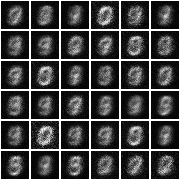

epoch number: 2
	
Training Loss:	0.21305235687494	
Test Loss:	0.19366028940678	


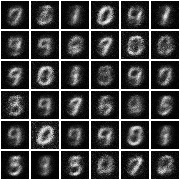

epoch number: 3
	
Training Loss:	0.1804053169926	
Test Loss:	0.1677928055048	


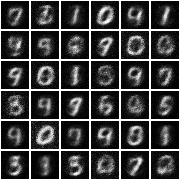

epoch number: 4
	
Training Loss:	0.1599540288806	
Test Loss:	0.15120403571129	


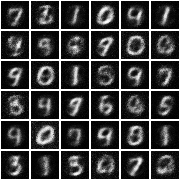

epoch number: 5
	
Training Loss:	0.14622637975216	
Test Loss:	0.13955051900148	


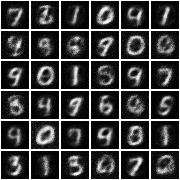

epoch number: 6
	
Training Loss:	0.13619578273296	
Test Loss:	0.13077827056646	


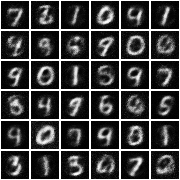

epoch number: 7
	
Training Loss:	0.12853397705754	
Test Loss:	0.12402277487516	


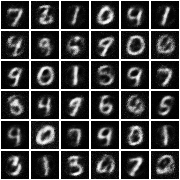

epoch number: 8
	
Training Loss:	

0.12260808993578	
Test Loss:	0.11877802488804	


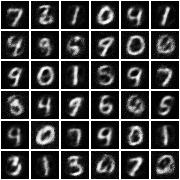

epoch number: 9
	
Training Loss:	0.11794550237656	
Test Loss:	0.11459417380095	


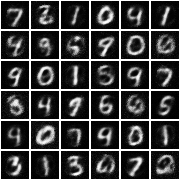

epoch number: 10
	
Training Loss:	0.11415511657596	
Test Loss:	0.11112716323137	


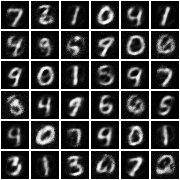

epoch number: 11
	
Training Loss:	0.11096247179906	
Test Loss:	0.10816508148909	


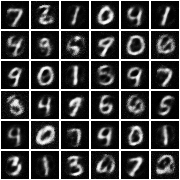

epoch number: 12
	
Training Loss:	0.10818775447806	
Test Loss:	0.10557684149742	


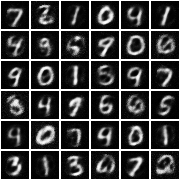

epoch number: 13
	
Training Loss:	0.10571541222533	
Test Loss:	0.10328037375212	


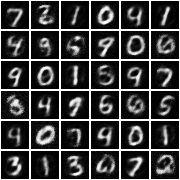

epoch number: 14
	
Training Loss:	0.1034726147294	
Test Loss:	0.10123496898413	


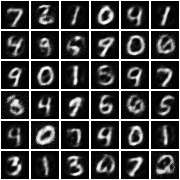

epoch number: 15
	
Training Loss:	0.10142178271612	
Test Loss:	0.099429874050617	


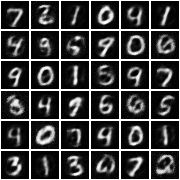

epoch number: 16
	
Training Loss:	0.099543316743771	
Test Loss:	0.097869532215595	


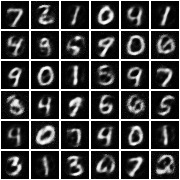

epoch number: 17
	
Training Loss:	0.097817470011115	
Test Loss:	0.096547182130814	


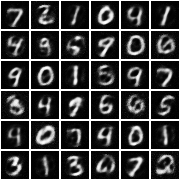

epoch number: 18
	
Training Loss:	0.096223802850644	
Test Loss:	0.095442058026791	


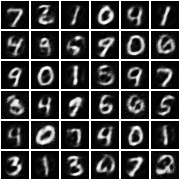

epoch number: 19
	
Training Loss:	0.094746423463027	
Test Loss:	0.094537438470125	


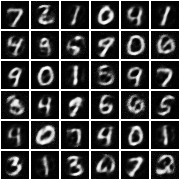

epoch number: 20
	
Training Loss:	0.093379497766495	
Test Loss:	0.093833895528317	


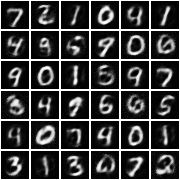

epoch number: 21
	
Training Loss:	0.092125398312012	
Test Loss:	0.093333749246597	


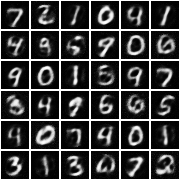

epoch number: 22
	
Training Loss:	0.090986773173014	
Test Loss:	0.09301708753705	


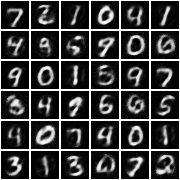

epoch number: 23
	
Training Loss:	0.089960806327065	
Test Loss:	0.09284006896019	


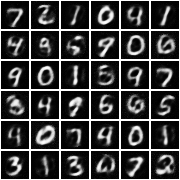

epoch number: 24
	
Training Loss:	0.089034971483548	
Test Loss:	0.092714934462309	


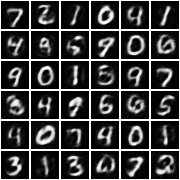

epoch number: 25
	
Training Loss:	0.088174338958661	
Test Loss:	0.092696876305342	


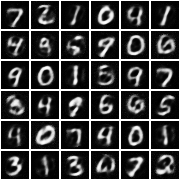

In [50]:
lr = 0.1 -- learning rate used for sgd
batchSize = 16
epochs = 25
printEval = true
trainLoss = torch.Tensor(epochs)
testLoss = torch.Tensor(epochs)


for e = 1, epochs do
    local lossAcc = 0
    local numBatches = 0
    
    for i = 1, trainData:size(1), batchSize do
        numBatches = numBatches + 1
        local x = trainData:narrow(1, i, batchSize):cuda()
        local y = model:forward(x)
        lossAcc = lossAcc + criterion:forward(y, x)

        model:zeroGradParameters() --zero grads
        local dE_dy = criterion:backward(y,x)
        model:backward(x, dE_dy) -- backpropagation
        
        w:add(-lr, dE_dw) -- naive sgd: w' = w - lr * dE_dw
    end
    
    trainLoss[e] = lossAcc / numBatches
    
    --Evaluate on test set
    lossAcc = 0
    numBatches = 0
    
    for i = 1, testData:size(1), batchSize do
        numBatches = numBatches + 1
        local x = testData:narrow(1, i, batchSize):cuda()
        local y = model:forward(x)
        lossAcc = lossAcc + criterion:forward(y, x)
    end
    
    testLoss[e] = lossAcc / numBatches
    
    if printEval then
        print('epoch number: ' .. e .. '\n')
        print('Training Loss:', trainLoss[e])
        print('Test Loss:', testLoss[e])
    
        --view reconstructed images
        x = testData:narrow(1, 1, 36):cuda()
        y = model:forward(x)
        itorch.image(y)
    end
  
end

In [51]:
-- scatter plots
local range = torch.range(1, epochs)
plot = itorch.Plot()
plot:line(range, trainLoss, 'red', 'Training Loss')
plot:line(range, testLoss, 'blue', 'Test Loss'):draw()
plot:title('AutoEncoder reconstruction loss'):redraw()
plot:xaxis('epoch'):yaxis('loss'):redraw()
plot:legend(true)
plot:redraw()

Reconstructed training images	


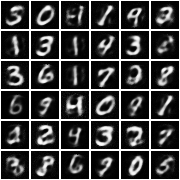

Reconstructed test images	


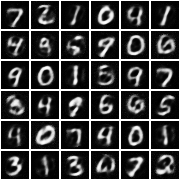

In [53]:
  print('Reconstructed training images')
        x = trainData:narrow(1, 1, 36):cuda()
        y = model:forward(x)
        itorch.image(y)

  print('Reconstructed test images')
        x = testData:narrow(1, 1, 36):cuda()
        y = model:forward(x)
        itorch.image(y)